In [232]:
import pandas as pd                                       #importing the pandas library to load and view data
import matplotlib.pyplot as plt                        #importing the matplotlib to plot the data

from sklearn.preprocessing import StandardScaler       #for clustering
from sklearn.cluster import KMeans                     #importing the KMeans for clustering
import numpy as np

In [233]:
weblink = pd.read_csv('Phishing.csv')


In [234]:
weblink

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


In [262]:
weblink.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


## Using Standard Deviaiton we can see that the URL_Depth and Domain_age has mostly hogh value.
## Therefore, we are going to plot the data based on this two value

In [235]:
df = pd.DataFrame({
    'x': weblink.URL_Depth,
    'y': weblink.Domain_Age,
    'cluster' : weblink.Label
})

In [236]:
df

,x,y,cluster
0,1,1,0
1,1,1,0
2,1,0,0
3,3,0,0
4,3,0,0
...,...,...,...
9995,5,1,1
9996,4,0,1
9997,3,1,1
9998,5,1,1


In [237]:
centroids = {}
for i in range(2):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [238]:
centroids

{0: [3.3268, 0.4556], 1: [2.8172, 0.3718]}

Text(0, 0.5, 'Domain_Age')

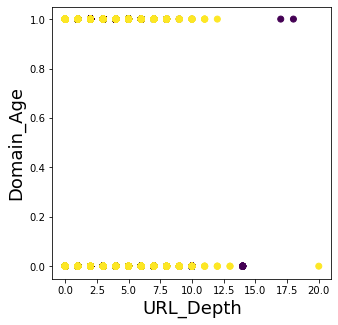

In [239]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=weblink.Label)
plt.xlabel('URL_Depth', fontsize=18)
plt.ylabel('Domain_Age', fontsize=18)

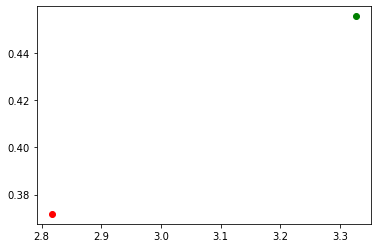

In [240]:
colmap = {0: 'g', 1: 'r'}
for i in range(2):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

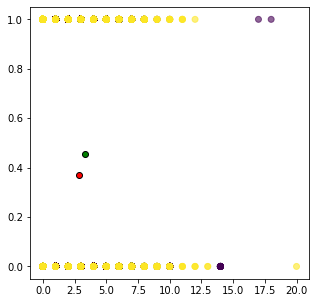

In [241]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=weblink.Label,alpha = 0.6)
colmap = {0: 'g', 1: 'r'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [242]:
def assignment(df, centroids):
    for i in range(2):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (centroids[i][0] - df['x']) ** 2
                + (centroids[i][1] - df['y']) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [243]:
df = assignment(df, centroids)

In [261]:
df.head(50)

,x,y,cluster,distance_from_0,distance_from_1,closest,color
0,1,1,0,4.416574,1.012925,1,r
1,1,1,0,4.416574,1.012925,1,r
2,1,0,0,4.391895,0.936746,1,r
3,3,0,0,2.406455,1.240908,1,r
4,3,0,0,2.406455,1.240908,1,r
5,4,1,0,1.503184,2.240437,0,g
6,2,1,0,3.428888,0.597660,1,r
7,6,0,0,0.737875,4.187290,0,g
8,2,0,0,3.397040,0.456807,1,r
9,5,0,0,0.541586,3.194091,0,g


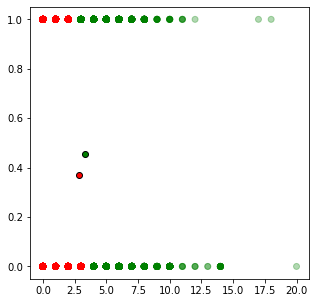

In [246]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [248]:
def update(k):
    for i in range(2):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [249]:
centroids = update(centroids)
centroids

{0: [4.960557392536608, 0.4974019839395371],
 1: [1.6852237252861602, 0.3522372528616025]}

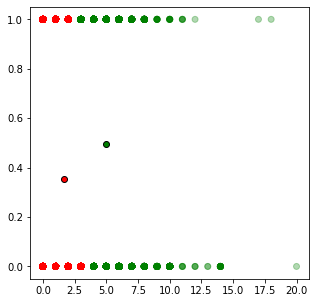

In [250]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [251]:
df = assignment(df, centroids)

In [252]:
df

,x,y,cluster,distance_from_0,distance_from_1,closest,color
0,1,1,0,3.992320,0.942936,1,r
1,1,1,0,3.992320,0.942936,1,r
2,1,0,0,3.991669,0.770456,1,r
3,3,0,0,2.022670,1.361142,1,r
4,3,0,0,2.022670,1.361142,1,r
...,...,...,...,...,...,...,...
9995,5,1,1,0.504143,3.377475,0,g
9996,4,0,1,1.081702,2.341423,0,g
9997,3,1,1,2.023954,1.465685,1,r
9998,5,1,1,0.504143,3.377475,0,g


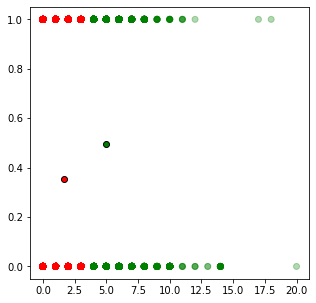

In [253]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

In [254]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

In [255]:
df = assignment(df, centroids)

In [256]:
df

,x,y,cluster,distance_from_0,distance_from_1,closest,color
0,1,1,0,4.416574,1.012925,1,r
1,1,1,0,4.416574,1.012925,1,r
2,1,0,0,4.391895,0.936746,1,r
3,3,0,0,2.406455,1.240908,1,r
4,3,0,0,2.406455,1.240908,1,r
...,...,...,...,...,...,...,...
9995,5,1,1,0.714637,3.217257,0,g
9996,4,0,1,1.429046,2.207042,0,g
9997,3,1,1,2.451208,1.299376,1,r
9998,5,1,1,0.714637,3.217257,0,g


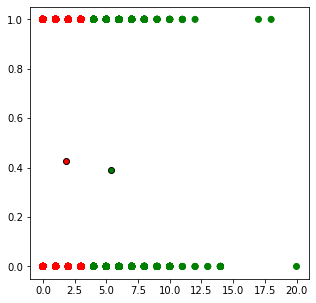

In [257]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

In [259]:
df.to_csv("clusterphishing.csv")